In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)

# 3-point centered

## Implicit Euler

In [2]:
m = 9
F = np.zeros((m,m),dtype=complex)
for j in range(m):
    for k in range(m):
        F[j,k] = np.exp(2j*np.pi*j*k/m)/np.sqrt(m)

In [3]:
nu = 10000.1
xi = 2*np.pi*np.arange(m)/m
d = 1./(1- nu*1j*np.sin(xi))
D = np.diag(d)
L = np.dot(F,np.dot(np.diag(1j*np.sin(xi)),F.conj()))
M = np.dot(F,np.dot(D,F.conj()))

In [4]:
np.real(L)

array([[ 0. ,  0.5, -0. ,  0. , -0. , -0. ,  0. , -0. , -0.5],
       [-0.5,  0. ,  0.5,  0. ,  0. , -0. , -0. , -0. , -0. ],
       [ 0. , -0.5, -0. ,  0.5, -0. ,  0. , -0. ,  0. , -0. ],
       [-0. , -0. , -0.5, -0. ,  0.5, -0. ,  0. ,  0. ,  0. ],
       [ 0. , -0. ,  0. , -0.5,  0. ,  0.5,  0. , -0. , -0. ],
       [ 0. ,  0. , -0. ,  0. , -0.5, -0. ,  0.5, -0. , -0. ],
       [-0. ,  0. ,  0. , -0. , -0. , -0.5, -0. ,  0.5, -0. ],
       [ 0. ,  0. , -0. , -0. ,  0. ,  0. , -0.5, -0. ,  0.5],
       [ 0.5,  0. ,  0. , -0. ,  0. ,  0. ,  0. , -0.5,  0. ]])

In [5]:
np.real(M)

array([[0.11111114, 0.11119998, 0.1110889 , 0.11117777, 0.11106667,
        0.11115555, 0.11104443, 0.11113334, 0.11102221],
       [0.11102221, 0.11111114, 0.11119998, 0.1110889 , 0.11117777,
        0.11106667, 0.11115555, 0.11104443, 0.11113334],
       [0.11113334, 0.11102221, 0.11111114, 0.11119998, 0.1110889 ,
        0.11117777, 0.11106667, 0.11115555, 0.11104443],
       [0.11104443, 0.11113334, 0.11102221, 0.11111114, 0.11119998,
        0.1110889 , 0.11117777, 0.11106667, 0.11115555],
       [0.11115555, 0.11104443, 0.11113334, 0.11102221, 0.11111114,
        0.11119998, 0.1110889 , 0.11117777, 0.11106667],
       [0.11106667, 0.11115555, 0.11104443, 0.11113334, 0.11102221,
        0.11111114, 0.11119998, 0.1110889 , 0.11117777],
       [0.11117777, 0.11106667, 0.11115555, 0.11104443, 0.11113334,
        0.11102221, 0.11111114, 0.11119998, 0.1110889 ],
       [0.1110889 , 0.11117777, 0.11106667, 0.11115555, 0.11104443,
        0.11113334, 0.11102221, 0.11111114, 0.11119998],


In [6]:
print(1./m)

0.1111111111111111


In [7]:
j = 2
np.sum(np.exp(-1j*(j-1)*xi)/(1.-nu*1j*np.sin(xi)))/m

(0.11119998429364004+5.722178132562385e-20j)

In [8]:
np.sum(np.exp(1j*xi)/(1./1-nu*1j*np.sin(xi)))/m

(0.11102220829954801+5.421010862427522e-20j)

In [9]:
np.linalg.eigvals(M)

array([1.        -0.j        , 0.00000009-0.00029238j,
       0.00000009+0.00029238j, 0.00000002-0.00015557j,
       0.00000001-0.00011547j, 0.00000001-0.00010154j,
       0.00000002+0.00015557j, 0.00000001+0.00010154j,
       0.00000001+0.00011547j])

In [10]:
d

array([1.        +0.j        , 0.00000002+0.00015557j,
       0.00000001+0.00010154j, 0.00000001+0.00011547j,
       0.00000009+0.00029238j, 0.00000009-0.00029238j,
       0.00000001-0.00011547j, 0.00000001-0.00010154j,
       0.00000002-0.00015557j])

In [11]:
np.sin(xi)

array([ 0.        ,  0.64278761,  0.98480775,  0.8660254 ,  0.34202014,
       -0.34202014, -0.8660254 , -0.98480775, -0.64278761])

In [12]:
xi

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361])

In [13]:
m = 9
xi = 2*np.pi*np.arange(1,m)/m
np.sum(np.cos(5*xi))

-0.9999999999999974

## $\theta$ method

In [14]:
m = 7
F = np.zeros((m,m),dtype=complex)
for j in range(m):
    for k in range(m):
        F[j,k] = np.exp(2j*np.pi*j*k/m)/np.sqrt(m)

In [15]:
nu = 1
theta = 0.25
xi = 2*np.pi*np.arange(m)/m
d = (1+(1-theta)*nu*1j*np.sin(xi))/(1- theta*nu*1j*np.sin(xi))
D = np.diag(d)
M = np.dot(F,np.dot(D,F.conj().T))
np.real(M)

array([[ 0.88057   ,  0.47773371,  0.05870032,  0.00813111, -0.00634858,
         0.05891971, -0.47770629],
       [-0.47770629,  0.88057   ,  0.47773371,  0.05870032,  0.00813111,
        -0.00634858,  0.05891971],
       [ 0.05891971, -0.47770629,  0.88057   ,  0.47773371,  0.05870032,
         0.00813111, -0.00634858],
       [-0.00634858,  0.05891971, -0.47770629,  0.88057   ,  0.47773371,
         0.05870032,  0.00813111],
       [ 0.00813111, -0.00634858,  0.05891971, -0.47770629,  0.88057   ,
         0.47773371,  0.05870032],
       [ 0.05870032,  0.00813111, -0.00634858,  0.05891971, -0.47770629,
         0.88057   ,  0.47773371],
       [ 0.47773371,  0.05870032,  0.00813111, -0.00634858,  0.05891971,
        -0.47770629,  0.88057   ]])

In [16]:
j = m
np.sum(np.exp(-1j*(j-1)*xi)*(1+(1-theta)*nu*1j*np.sin(xi))/(1.-theta*nu*1j*np.sin(xi)))/m

(-0.4777062858435684-5.075305255429287e-16j)

In [17]:
np.sum(-nu*(np.sin(xi))**2/(1+theta**2*nu**2*(np.sin(xi))**2))/m

-0.47771999766898965

# Spectral collocation

## Two ways of constructing the differentiation matrix
For some reason this formula is not right when $m$ is even (it gives complex entries).

In [43]:
def F_matrix(m):
    F = np.zeros((m,m),dtype=complex)
    for j in range(m):
        v = np.zeros(m)
        v[j] = 1.
        F[:,j] = np.fft.fft(v)
    return F

m = 12
L = 1#2*np.pi
F = F_matrix(m)
x = np.arange(m)*L/m   # Grid points
xi = np.fft.fftfreq(m)*2*np.pi  # Wavenumber "grid"
if m % 2 == 0:  # Handle Nyquist frequency
    xi[m//2]=0
print(xi)

D = np.diag(1j*xi)
DD = np.dot(np.linalg.inv(F),np.dot(D,F))
print(DD)

[ 0.          0.52359878  1.04719755  1.57079633  2.0943951   2.61799388
  0.         -2.61799388 -2.0943951  -1.57079633 -1.04719755 -0.52359878]
[[ 0.        +0.j  0.97704862-0.j -0.45344984+0.j  0.26179939-0.j
  -0.15114995-0.j  0.07014893+0.j -0.        -0.j -0.07014893+0.j
   0.15114995-0.j -0.26179939+0.j  0.45344984-0.j -0.97704862-0.j]
 [-0.97704862-0.j -0.        -0.j  0.97704862+0.j -0.45344984-0.j
   0.26179939-0.j -0.15114995+0.j  0.07014893+0.j -0.        +0.j
  -0.07014893+0.j  0.15114995-0.j -0.26179939-0.j  0.45344984+0.j]
 [ 0.45344984+0.j -0.97704862+0.j  0.        -0.j  0.97704862-0.j
  -0.45344984+0.j  0.26179939+0.j -0.15114995-0.j  0.07014893+0.j
   0.        -0.j -0.07014893+0.j  0.15114995+0.j -0.26179939-0.j]
 [-0.26179939+0.j  0.45344984+0.j -0.97704862-0.j -0.        +0.j
   0.97704862+0.j -0.45344984-0.j  0.26179939+0.j -0.15114995-0.j
   0.07014893-0.j -0.        +0.j -0.07014893+0.j  0.15114995-0.j]
 [ 0.15114995+0.j -0.26179939-0.j  0.45344984-0.j -0.9770

In [44]:
F = np.zeros((m,m),dtype=complex)
for j in range(m):
    for k in range(m):
        F[j,k] = np.exp(2j*np.pi*j*k/m)/np.sqrt(m) # Note the minus sign
        
L=np.dot(F,np.dot(np.diag(1j*xi),F.conj()))
print(L)

[[ 0.        +0.j  0.97704862+0.j -0.45344984-0.j  0.26179939+0.j
  -0.15114995+0.j  0.07014893+0.j  0.        -0.j -0.07014893+0.j
   0.15114995-0.j -0.26179939+0.j  0.45344984-0.j -0.97704862-0.j]
 [-0.97704862+0.j -0.        -0.j  0.97704862+0.j -0.45344984-0.j
   0.26179939+0.j -0.15114995+0.j  0.07014893+0.j -0.        +0.j
  -0.07014893+0.j  0.15114995-0.j -0.26179939-0.j  0.45344984+0.j]
 [ 0.45344984-0.j -0.97704862+0.j -0.        -0.j  0.97704862+0.j
  -0.45344984-0.j  0.26179939-0.j -0.15114995-0.j  0.07014893-0.j
  -0.        +0.j -0.07014893-0.j  0.15114995-0.j -0.26179939-0.j]
 [-0.26179939+0.j  0.45344984-0.j -0.97704862+0.j  0.        +0.j
   0.97704862+0.j -0.45344984+0.j  0.26179939+0.j -0.15114995+0.j
   0.07014893-0.j -0.        -0.j -0.07014893-0.j  0.15114995-0.j]
 [ 0.15114995+0.j -0.26179939+0.j  0.45344984-0.j -0.97704862+0.j
  -0.        -0.j  0.97704862-0.j -0.45344984+0.j  0.26179939+0.j
  -0.15114995+0.j  0.07014893+0.j -0.        +0.j -0.07014893+0.j]
 [-0.

In [45]:
print(L-DD)

[[-0.-0.j  0.+0.j  0.-0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j -0.-0.j  0.-0.j
   0.+0.j  0.-0.j -0.-0.j]
 [-0.+0.j  0.-0.j  0.+0.j -0.+0.j  0.+0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j
   0.-0.j  0.-0.j  0.+0.j]
 [ 0.-0.j -0.+0.j -0.-0.j  0.+0.j  0.-0.j -0.-0.j  0.-0.j -0.-0.j -0.+0.j
  -0.-0.j -0.-0.j  0.+0.j]
 [ 0.+0.j  0.-0.j -0.+0.j  0.-0.j -0.-0.j  0.+0.j  0.+0.j -0.+0.j  0.-0.j
  -0.-0.j -0.-0.j -0.-0.j]
 [ 0.+0.j -0.+0.j  0.-0.j  0.-0.j -0.-0.j  0.-0.j -0.+0.j  0.+0.j -0.+0.j
  -0.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j  0.-0.j -0.-0.j -0.-0.j -0.-0.j  0.+0.j  0.+0.j -0.-0.j  0.+0.j
   0.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j  0.-0.j -0.-0.j  0.-0.j  0.-0.j -0.+0.j  0.+0.j  0.-0.j  0.-0.j
   0.-0.j -0.+0.j -0.-0.j]
 [-0.+0.j -0.+0.j  0.-0.j  0.+0.j  0.+0.j  0.-0.j  0.-0.j  0.+0.j  0.+0.j
  -0.+0.j -0.-0.j  0.+0.j]
 [ 0.-0.j -0.+0.j  0.-0.j -0.-0.j  0.+0.j -0.+0.j -0.-0.j -0.+0.j  0.-0.j
   0.-0.j  0.+0.j  0.-0.j]
 [-0.+0.j -0.-0.j  0.-0.j  0.-0.j  0.+0.j -0.+0.j -0.-0.j  0.+0.j -0.-0.j
   0.-0.j  0.-0.j

## Backward Euler

In [46]:
nu = 1.
d = 1 - nu*1j*xi
D = np.diag(d)
Dinv = np.diag(1./d)
M = np.dot(F,np.dot(Dinv,F.conj()))
M = np.real(M)
M

array([[ 0.47719441,  0.38491871,  0.16656684, -0.00000855,  0.07873336,
        -0.06131545,  0.07700798, -0.07993946,  0.08827245, -0.09709409,
         0.11222496, -0.14656117],
       [-0.14656117,  0.47719441,  0.38491871,  0.16656684, -0.00000855,
         0.07873336, -0.06131545,  0.07700798, -0.07993946,  0.08827245,
        -0.09709409,  0.11222496],
       [ 0.11222496, -0.14656117,  0.47719441,  0.38491871,  0.16656684,
        -0.00000855,  0.07873336, -0.06131545,  0.07700798, -0.07993946,
         0.08827245, -0.09709409],
       [-0.09709409,  0.11222496, -0.14656117,  0.47719441,  0.38491871,
         0.16656684, -0.00000855,  0.07873336, -0.06131545,  0.07700798,
        -0.07993946,  0.08827245],
       [ 0.08827245, -0.09709409,  0.11222496, -0.14656117,  0.47719441,
         0.38491871,  0.16656684, -0.00000855,  0.07873336, -0.06131545,
         0.07700798, -0.07993946],
       [-0.07993946,  0.08827245, -0.09709409,  0.11222496, -0.14656117,
         0.47719441,  

In [190]:
M[0,:]

array([ 0.40337615,  0.46517643,  0.08114055,  0.09234154, -0.02278769,
        0.05541291, -0.07465989])

In [191]:
j=3
#lamda = 2*np.pi*xi/m
xxi = 2*np.pi*np.arange(m)/m
[np.sum(np.exp(-1j*j*xxi)*1./(1-nu*1j*xi))/m for j in range(m)]

[(0.40337614763053153+1.586032892321652e-17j),
 (0.4651764319067382+3.7668281192639235e-17j),
 (0.08114055416726605-3.172065784643304e-17j),
 (0.09234154169973044+0j),
 (-0.022787693089044048-6.344131569286608e-17j),
 (0.055412907794449004-7.137148015447434e-17j),
 (-0.07465989010967117-1.586032892321652e-16j)]

In [192]:
xi

array([ 0.       ,  0.8975979,  1.7951958,  2.6927937, -2.6927937,
       -1.7951958, -0.8975979])

In [193]:
xxi

array([0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
       4.48798951, 5.38558741])

In [194]:
[np.sum((np.cos(j*xxi)+nu*xi*np.sin(j*xxi))/(1+nu**2*xi**2))/m for j in range(m)]

[0.4033761476305315,
 0.46517643190673824,
 0.08114055416726607,
 0.09234154169973044,
 -0.022787693089044016,
 0.055412907794449025,
 -0.07465989010967118]

In [205]:
j = 4
thet = 2*np.pi * np.arange(1,(m+1)/2)/m  # here should divide by domain length?
thetj = 2*np.pi*j*np.arange(1,(m+1)/2)/m
#thet = thet[1:(m+1)/2]
#thetj = thetj[1:(m+1)/2]
(1+2*np.sum((np.cos(thetj)+nu*thet*np.sin(thetj))/(1+nu**2*thet**2)))/m

-0.022787693089044016

In [155]:
thet

array([0.8975979, 1.7951958, 2.6927937])

In [138]:
xxi

array([0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
       4.48798951, 5.38558741])

In [139]:
xi

array([ 0.,  1.,  2.,  3., -3., -2., -1.])

In [81]:
#np.imag(M)

In [82]:
j = 1
np.sum(np.exp(-1j*(1-j)*xi)/d)/m

(0.37142857142857144-1.586032892321652e-17j)

In [28]:
L = np.dot(F.conj().T,np.dot(np.diag(1j*xi),F))
L

array([[ 0.        -0.5j, -4.75718223+0.5j,  2.35231505-0.5j,
        -1.53884177+0.5j,  1.12301839-0.5j, -0.8660254 +0.5j,
         0.68819096-0.5j, -0.55530626+0.5j,  0.45020202-0.5j,
        -0.36327126+0.5j,  0.28867513-0.5j, -0.22261434+0.5j,
         0.16245985-0.5j, -0.10627828+0.5j,  0.05255212-0.5j,
        -0.        +0.5j, -0.05255212-0.5j,  0.10627828+0.5j,
        -0.16245985-0.5j,  0.22261434+0.5j, -0.28867513-0.5j,
         0.36327126+0.5j, -0.45020202-0.5j,  0.55530626+0.5j,
        -0.68819096-0.5j,  0.8660254 +0.5j, -1.12301839-0.5j,
         1.53884177+0.5j, -2.35231505-0.5j,  4.75718223+0.5j],
       [ 4.75718223+0.5j, -0.        -0.5j, -4.75718223+0.5j,
         2.35231505-0.5j, -1.53884177+0.5j,  1.12301839-0.5j,
        -0.8660254 +0.5j,  0.68819096-0.5j, -0.55530626+0.5j,
         0.45020202-0.5j, -0.36327126+0.5j,  0.28867513-0.5j,
        -0.22261434+0.5j,  0.16245985-0.5j, -0.10627828+0.5j,
         0.05255212-0.5j,  0.        +0.5j, -0.05255212-0.5j,
       

In [29]:
mm = 5
FF = F_matrix(mm)
xi = 2*np.pi*np.arange(mm)/mm
np.dot(FF.conj().T,np.dot(np.diag(1j*np.sin(xi)),FF))

array([[ 0. +0.j,  2.5-0.j,  0. +0.j,  0. +0.j, -2.5-0.j],
       [-2.5-0.j, -0. +0.j,  2.5-0.j, -0. +0.j, -0. -0.j],
       [-0. +0.j, -2.5-0.j, -0. +0.j,  2.5-0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j, -2.5-0.j,  0. +0.j,  2.5-0.j],
       [ 2.5-0.j,  0. -0.j,  0. +0.j, -2.5-0.j,  0. +0.j]])

In [30]:
np.dot(FF.conj().T,np.dot(np.diag(1j*xi),FF))

array([[ 0.        +12.56637061j, -4.32403133 -3.14159265j,
        -1.02076533 -3.14159265j,  1.02076533 -3.14159265j,
         4.32403133 -3.14159265j],
       [ 4.32403133 -3.14159265j,  0.        +12.56637061j,
        -4.32403133 -3.14159265j, -1.02076533 -3.14159265j,
         1.02076533 -3.14159265j],
       [ 1.02076533 -3.14159265j,  4.32403133 -3.14159265j,
        -0.        +12.56637061j, -4.32403133 -3.14159265j,
        -1.02076533 -3.14159265j],
       [-1.02076533 -3.14159265j,  1.02076533 -3.14159265j,
         4.32403133 -3.14159265j,  0.        +12.56637061j,
        -4.32403133 -3.14159265j],
       [-4.32403133 -3.14159265j, -1.02076533 -3.14159265j,
         1.02076533 -3.14159265j,  4.32403133 -3.14159265j,
        -0.        +12.56637061j]])

In [19]:
m = 5
L = 2*np.pi
F = F_matrix(m)
x = np.arange(0,m)*(2*np.pi/(m))   # Grid points
xi = np.fft.fftfreq(m)*m*2*np.pi/L  # Wavenumber "grid"

D = np.diag(1j*xi)
DD = np.dot(np.linalg.inv(F),np.dot(D,F))
DD

array([[ 0.        -0.j,  0.85065081+0.j, -0.52573111-0.j,
         0.52573111+0.j, -0.85065081-0.j],
       [-0.85065081-0.j,  0.        +0.j,  0.85065081+0.j,
        -0.52573111-0.j,  0.52573111+0.j],
       [ 0.52573111+0.j, -0.85065081-0.j, -0.        +0.j,
         0.85065081-0.j, -0.52573111+0.j],
       [-0.52573111+0.j,  0.52573111-0.j, -0.85065081-0.j,
        -0.        -0.j,  0.85065081-0.j],
       [ 0.85065081-0.j, -0.52573111+0.j,  0.52573111+0.j,
        -0.85065081-0.j, -0.        +0.j]])

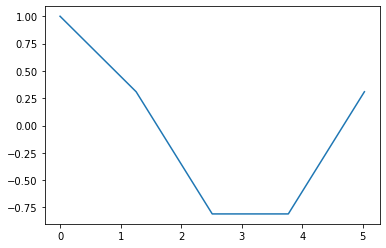

In [20]:
u = np.sin(x)
plt.plot(x,np.dot(np.real(DD),u))

In [21]:
np.dot(DD,u)

array([ 1.        -0.j,  0.30901699+0.j, -0.80901699+0.j, -0.80901699-0.j,
        0.30901699+0.j])

In [ ]:
FF

In [ ]:
m = 4
F = np.zeros((m,m),dtype=complex)
for j in range(m):
    for k in range(m):
        F[j,k] = np.exp(2j*np.pi*j*k/m)/np.sqrt(m)
np.sqrt(m)*F.conj()-FF

In [110]:
m = 5
F = np.zeros((m,m),dtype=complex)
for j in range(m):
    for k in range(m):
        F[j,k] = np.exp(-2j*np.pi*j*k/m)/np.sqrt(m)
print(F/F[0,0])
xi = np.fft.fftfreq(m)*m*2*np.pi/L

[[ 1.        +0.j          1.        +0.j          1.        +0.j
   1.        +0.j          1.        +0.j        ]
 [ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
  -0.80901699+0.58778525j  0.30901699+0.95105652j]
 [ 1.        +0.j         -0.80901699-0.58778525j  0.30901699+0.95105652j
   0.30901699-0.95105652j -0.80901699+0.58778525j]
 [ 1.        +0.j         -0.80901699+0.58778525j  0.30901699-0.95105652j
   0.30901699+0.95105652j -0.80901699-0.58778525j]
 [ 1.        +0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
  -0.80901699-0.58778525j  0.30901699-0.95105652j]]


In [111]:
F1 = F_matrix(m)
xi = np.fft.fftfreq(m)*m*2*np.pi/L
np.dot(F1.conj().T,np.dot(np.diag(1j*xi),F1))

array([[ 0.        +0.j,  4.25325404+0.j, -2.62865556+0.j,
         2.62865556+0.j, -4.25325404+0.j],
       [-4.25325404+0.j,  0.        +0.j,  4.25325404+0.j,
        -2.62865556-0.j,  2.62865556-0.j],
       [ 2.62865556+0.j, -4.25325404+0.j,  0.        +0.j,
         4.25325404-0.j, -2.62865556-0.j],
       [-2.62865556+0.j,  2.62865556-0.j, -4.25325404-0.j,
         0.        +0.j,  4.25325404+0.j],
       [ 4.25325404+0.j, -2.62865556-0.j,  2.62865556-0.j,
        -4.25325404+0.j,  0.        +0.j]])

In [119]:
np.dot(F1.conj().T,F1)

array([[ 5.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j],
       [ 0.-0.j,  5.+0.j, -0.-0.j, -0.+0.j,  0.-0.j],
       [ 0.+0.j, -0.+0.j,  5.+0.j,  0.-0.j, -0.+0.j],
       [ 0.+0.j, -0.-0.j,  0.+0.j,  5.+0.j, -0.-0.j],
       [ 0.+0.j,  0.+0.j, -0.-0.j, -0.+0.j,  5.+0.j]])

In [120]:
L=np.dot(F.conj().T,np.dot(np.diag(1j*xi),F))

In [121]:
np.linalg.eigvals(L)

array([ 0.-2.j, -0.+2.j, -0.-1.j,  0.-0.j,  0.+1.j])

In [122]:
xi*1j

array([ 0.+0.j,  0.+1.j,  0.+2.j, -0.-2.j, -0.-1.j])

In [90]:
F1-F1.conj().T

array([[ 0.+0.j        ,  0.+0.j        ,  0.+0.j        ,
         0.+0.j        ,  0.+0.j        ,  0.+0.j        ],
       [ 0.+0.j        ,  0.-1.73205081j,  0.-1.73205081j,
         0.+0.j        ,  0.+1.73205081j, -0.+1.73205081j],
       [ 0.+0.j        , -0.-1.73205081j,  0.+1.73205081j,
         0.+0.j        ,  0.-1.73205081j,  0.+1.73205081j],
       [ 0.+0.j        ,  0.+0.j        ,  0.+0.j        ,
         0.+0.j        ,  0.-0.j        ,  0.-0.j        ],
       [ 0.+0.j        , -0.+1.73205081j,  0.-1.73205081j,
         0.-0.j        ,  0.+1.73205081j,  0.-1.73205081j],
       [ 0.+0.j        ,  0.+1.73205081j,  0.+1.73205081j,
         0.-0.j        ,  0.-1.73205081j,  0.-1.73205081j]])

In [91]:
F1

array([[ 1. +0.j       ,  1. +0.j       ,  1. +0.j       ,
         1. +0.j       ,  1. +0.j       ,  1. +0.j       ],
       [ 1. +0.j       ,  0.5-0.8660254j, -0.5-0.8660254j,
        -1. +0.j       , -0.5+0.8660254j,  0.5+0.8660254j],
       [ 1. +0.j       , -0.5-0.8660254j, -0.5+0.8660254j,
         1. +0.j       , -0.5-0.8660254j, -0.5+0.8660254j],
       [ 1. +0.j       , -1. +0.j       ,  1. +0.j       ,
        -1. +0.j       ,  1. -0.j       , -1. -0.j       ],
       [ 1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j,
         1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j],
       [ 1. +0.j       ,  0.5+0.8660254j, -0.5+0.8660254j,
        -1. +0.j       , -0.5-0.8660254j,  0.5-0.8660254j]])